
# Data Analytics - Base de datos AgenteSalas 

## Librerias

In [113]:
# generales
import pandas as pd
import numpy as  np

# bases de datos
import mysql.connector
import sqlite3 as sql
import psycopg2
import pyodbc

from mysql.connector import Error
from sqlite3 import OperationalError

# visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.get_backend()


'module://matplotlib_inline.backend_inline'

## Conexión con base de datos

In [114]:
# crear diccionario de credenciales 
# conectar a servidor y schema(mySQL Workbench)
mydb = {
    "host": "127.0.0.1",
    "user": "root",
    "password": "201513417Diego",
    "database": "agentes_salas"
}

type(mydb)

dict

In [115]:
# Connect to the MySQL database
connection = mysql.connector.connect(**mydb)
cursor = connection.cursor()

## Extraer variables de base de datos

Tablas:columnas

* baneados: usuario(PK), sancion, fecha_sancion, activa
* cantidad salas: sala (PK), total
* doblelogin: usuario (PK)
* equipos: equipo, direccion IP, usuario (PK)
* historial: usuario (PK), equipo, fecha
* historial_ocupacion: hora, sala(PK), ocupacion
* reservaExtendida: id, usuario(PK), fecha_final_reserva



## Queries 

Extraer tablas de base de datos y convertir en DataFrames (pandas)


In [116]:

query1 = "SELECT * FROM agentes_salas.baneados "
cursor.execute(query1) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
baneados = pd.DataFrame(data, columns=["usuario", "sancion","fecha_sancion","activa"])
baneados = baneados.reset_index(drop=True)
baneados


,usuario,sancion,fecha_sancion,activa
0,sisdj.mendez2973,3,2016-09-01 12:08:16,0
1,sisda-moren,5,2015-02-19 07:52:04,0
2,siss.carvajal269,5,2015-02-18 12:09:19,0
3,sisjs.silva266,5,2015-02-20 10:10:56,0
4,siscm.rodriguez155,5,2015-02-16 13:46:51,0
...,...,...,...,...
247,siswaira2,1,2022-04-22 18:51:50,0
248,siswaira2,1,2022-04-29 21:06:20,0
249,siswaira1,1,2022-05-06 15:17:26,0
250,siswaira2,1,2022-05-06 18:50:49,0


In [117]:
query2 = "SELECT * FROM agentes_salas.cantidad_salas"
cursor.execute(query2) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
cantidad_salas = pd.DataFrame(data, columns=["sala", "total"])
cantidad_salas = cantidad_salas.reset_index(drop=True)
cantidad_salas

,sala,total
0,waira 1,48
1,waira 2,30
2,turing,39


In [118]:
query3 = "SELECT * FROM agentes_salas.equipos"
cursor.execute(query3) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
equipos = pd.DataFrame(data, columns=["equipo", "direccionIP","usuario"])
equipos = equipos.reset_index(drop=True)
equipos

,equipo,direccionIP,usuario
0,ISC203,157.253.202.13,no user
1,ISC301,157.253.239.11,no user
2,ISC302,157.253.239.12,sism.zuliani
3,ISC202,157.253.202.12,no user
4,ISC201,157.253.202.11,no user
...,...,...,...
114,ISC240,157.253.202.50,no user
115,ISC241,157.253.202.51,no user
116,ISC236,157.253.202.46,no user
117,ML605CIVIL,157.253.198.37,no user


In [119]:
query4 = "SELECT * FROM agentes_salas.historial"
cursor.execute(query4) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
historial = pd.DataFrame(data, columns=["usuario", "equipo","fecha"])
historial = historial.reset_index(drop=True)
historial

,usuario,equipo,fecha
0,siss.sanchez59,ISC422,2015-03-02 09:47:58
1,sisd.torres11,ISC202,2015-03-02 09:47:36
2,no user,ISC318,2015-03-02 09:47:27
3,no user,ISC314,2015-03-02 09:47:19
4,sisf.cueto10,ISC208,2015-03-02 09:47:18
...,...,...,...
2028910,sisj.pinzons,ISC424,2023-08-16 08:10:35
2028911,sism.zuliani,ISC302,2023-08-16 08:23:04
2028912,no user,ISC325,2023-08-16 08:23:08
2028913,sisje.briceno2,ISC318,2023-08-16 08:34:31


In [121]:
query5 = "SELECT * FROM agentes_salas.historial_ocupacion"
cursor.execute(query5) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
historial_ocupacion = pd.DataFrame(data, columns=["hora", "sala","ocupacion"])
historial_ocupacion = historial.reset_index(drop=True)
historial_ocupacion

,usuario,equipo,fecha
0,siss.sanchez59,ISC422,2015-03-02 09:47:58
1,sisd.torres11,ISC202,2015-03-02 09:47:36
2,no user,ISC318,2015-03-02 09:47:27
3,no user,ISC314,2015-03-02 09:47:19
4,sisf.cueto10,ISC208,2015-03-02 09:47:18
...,...,...,...
2028910,sisj.pinzons,ISC424,2023-08-16 08:10:35
2028911,sism.zuliani,ISC302,2023-08-16 08:23:04
2028912,no user,ISC325,2023-08-16 08:23:08
2028913,sisje.briceno2,ISC318,2023-08-16 08:34:31


In [122]:
query6 = "SELECT * FROM agentes_salas.reservaextendida"
cursor.execute(query6) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# Convert data to a DataFrame
reservaextendida = pd.DataFrame(data, columns=["id", "usuario","fecha_final_reserva"])
reservaextendida = reservaextendida.reset_index(drop=True)
reservaextendida

,id,usuario,fecha_final_reserva
0,6,sisturing,2016-10-07 14:01:15
1,5,siswaira2,2016-08-01 19:00:00


## Análisis Descriptivo

Baneados
* contar número total de usuarios baneados
* contar proporcion de bans activos vs. inactivos
* sanción más comun

Cantidad Salas
* contar numero total de salas unicas
* calcular numero total de sala en todos los records

Doble login
* calcular numero total de usuarios con multiples logins


Equipos
* contar número de equipos unicos
* identificar el equipo más usado

Historial
* contar número de entradas en el historial
* identificar usuario más comun por cada equipo

Historial Ocupacion
* horas (franja horaria) con mayor ocupación

Reserva Extendida
* Contar numero de reservas extendidas







In [126]:
baneados['sancion'].value_counts(normalize=True)

8       0.345238
10      0.142857
1       0.138889
3       0.075397
5       0.071429
35      0.055556
29      0.039683
15      0.023810
30      0.023810
12      0.011905
20      0.011905
985     0.007937
114     0.007937
4       0.007937
250     0.003968
50      0.003968
7300    0.003968
500     0.003968
200     0.003968
43      0.003968
100     0.003968
45      0.003968
28      0.003968
Name: sancion, dtype: float64

In [134]:
group1 = baneados.groupby('sancion') 
group1.count()

,usuario,fecha_sancion,activa
sancion,,,
1,35,35,35
3,19,19,19
4,2,2,2
5,18,18,18
8,87,87,87
10,36,36,36
12,3,3,3
15,6,6,6
20,3,3,3


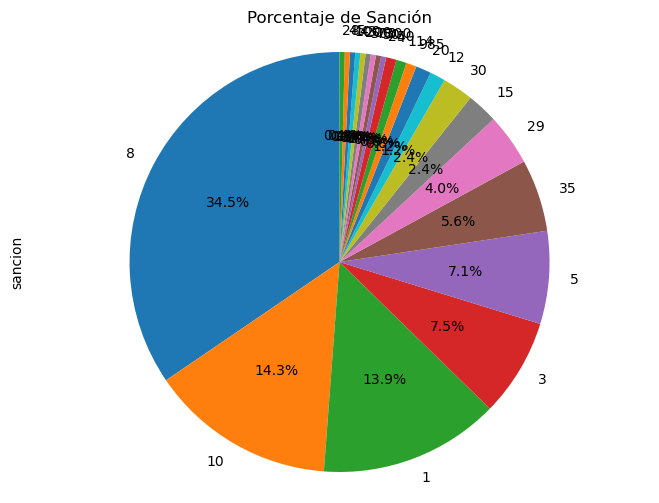

In [128]:

baneados['sancion'].value_counts()
# calcular proporcion de clases
class_proportions = baneados['sancion'].value_counts(normalize=True)

# crear pie plot
plt.figure(figsize=(8, 6))
class_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Sanción')
#plt.legend(labels=['No presenta','Depresión Grave'], loc='best')
plt.axis('equal')

# Show the plot
plt.show()

In [130]:
baneados['activa'].value_counts(normalize=True)

0    0.996032
1    0.003968
Name: activa, dtype: float64

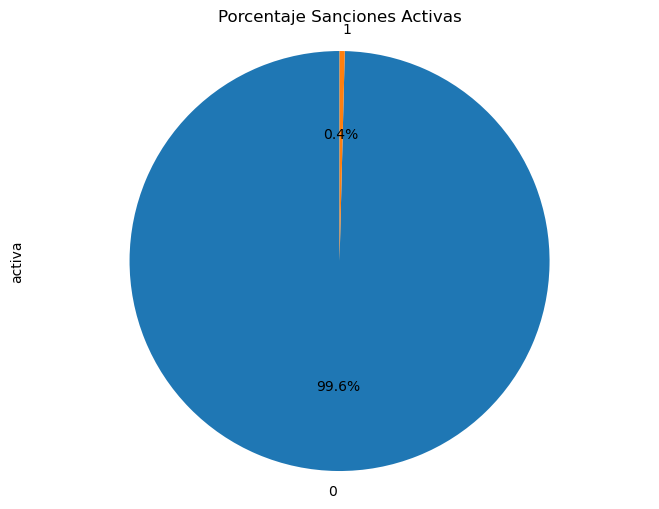

In [129]:
baneados['activa'].value_counts()
# calcular proporcion de clases
class_proportions = baneados['activa'].value_counts(normalize=True)

# crear pie plot
plt.figure(figsize=(8, 6))
class_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje Sanciones Activas')
#plt.legend(labels=['No presenta','Depresión Grave'], loc='best')
plt.axis('equal')

# Show the plot
plt.show()

## Análisis Estadístico

* 

## Técnicas de Correlación


## Visualizacion de datos

Análisis descriptivo y visualización de base de datos


* Equipos que más se usan
* Usuarios que más se conectan
* Franja horaria de mayor uso


Graficas

* Pie chart: tipo de sancion - tabla: baneados
* Pie chart: cantidad salas - tabla: cantidad salas
* Pie chart: tipo de usuario - tabla: equipos



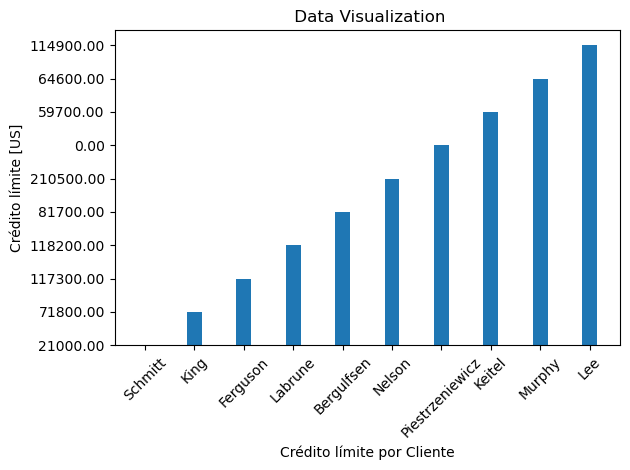

In [20]:
# bar chart bar(x,y,width=w )  
plt.bar(nombre_cliente , credito_limite, width = 0.3)
plt.xlabel("Crédito límite por Cliente")
plt.ylabel("Crédito límite [US]")
plt.title(" Data Visualization")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.legend(loc=4, frameon=False, title='Crédito límite')

# Show the chart
plt.tight_layout()
plt.show()


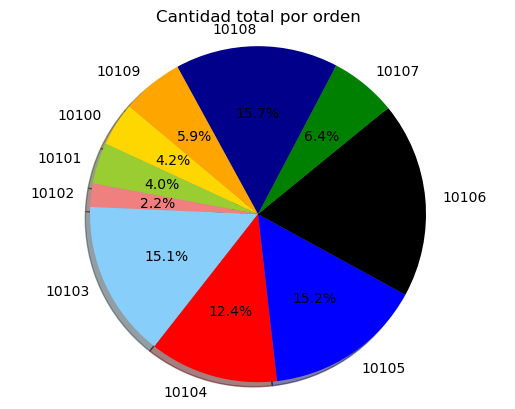

In [21]:
# colores de categorias
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','blue','black','green','darkblue','orange']

# Create a pie chart with custom colors, explosion, and shadow
#explode = (0.1, 0, 0, 0)  # Explode the first slice

plt.pie(cantidad_tot, labels=num_orden, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)

plt.axis('equal')

# Add a title
plt.title('Cantidad total por orden')

# Display the chart
plt.show()

# Machine Learning and AI

## Apagar Cursor y Conexión con base de  datos

In [80]:
# Close the cursor and connection
cursor.close()
connection.close()